In [5]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [9]:
# file to load
city_data_to_load = os.path.join("data", "city_data.csv")
ride_data_to_load = os.path.join("data", "ride_data.csv")

In [11]:
# read the city and ride data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [12]:
# make sure the data is ready to merge
city_df["city"].nunique() == ride_df["city"].nunique()
city_df.head()
city_df.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [13]:
ride_df.head()
ride_df.columns

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [14]:
# combine the data into a single dataset
city_ride_df = pd.merge(ride_df, city_df, how="outer", on="city")
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

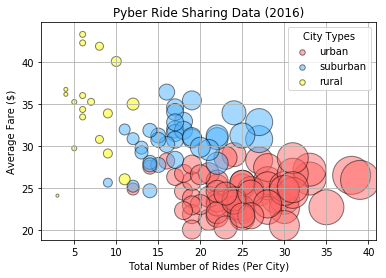

In [18]:
# Build the scatter plots for each city types
urban_handle = plt.scatter(
    x=g_urban_ride_df["ride_id"].count(), 
    y=g_urban_ride_df["fare"].mean(),
    s=g_urban_ride_df["ride_id"].count()**2,
    marker="o",
    c=[1,0.4,0.4,0.9],
    alpha=0.5,
    edgecolors="black"
)

suburban_handle = plt.scatter(
    x=g_suburban_ride_df["ride_id"].count(),
    y=g_suburban_ride_df["fare"].mean(),
    s=g_suburban_ride_df["ride_id"].count()**2,
    marker="o",
    c=[0.3,0.7,1,0.8],
    alpha=0.5,
    edgecolors="black"
)

rural_handle = plt.scatter(
    x=g_rural_ride_df["ride_id"].count(),
    y=g_rural_ride_df["fare"].mean(),
    s=g_rural_ride_df["ride_id"].count()**2,
    marker="o",
    c=[1,1,0,1],
    alpha=0.5,
    edgecolors="black"
)

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(b=True)

# Create a legend
lgnd = plt.legend(
    labels=["urban", "suburban", "rural"],
    loc="upper right", 
    title="City Types",
)

# Make all the icons of the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

# get current figure
fig1 = plt.gcf()

In [21]:
# Save Figure
fig1_path = os.path.join("..","Pyber", "PyberRideSharing_Scatter")
fig1.savefig(fig1_path, dpi=1200)

## Total Fares by City Type

In [22]:
# Calculate Type Percents
g_city_ride_df = city_ride_df.groupby("type")
faresbycity_pt = g_city_ride_df["fare"].sum() / city_ride_df["fare"].sum()

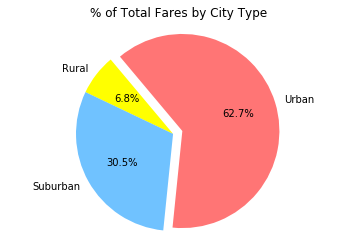

In [23]:
# Build Pie Chart
plt.pie(x=faresbycity_pt,
        explode=[0,0,0.1],
        labels=["Rural", "Suburban", "Urban"],
        colors=[[1,1,0,1], [0.3,0.7,1,0.8], [1,0.4,0.4,0.9]],
        autopct="%1.1f%%",
        startangle=130,
        shadow=False,
       )

plt.title("% of Total Fares by City Type")

# create axes which are equal so we have a perfect circle
plt.axis("equal")

# get current figure
fig2 = plt.gcf()

In [24]:
# Save Figure
fig2_path = os.path.join("..", "Pyber", "FaresByCity_Pie")
fig2.savefig(fig2_path, dpi=1200)

In [25]:
# Show Figure
plt.show()

## Total Rides by City Type

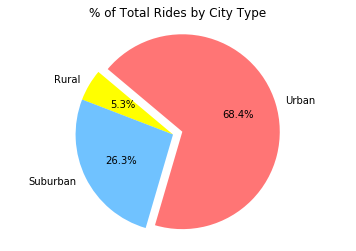

In [26]:
# Calculate Ride Percents
ridesbycity_pt = g_city_ride_df["ride_id"].count() / sum(g_city_ride_df["ride_id"].count())

# Build Pie Chart
plt.pie(x=ridesbycity_pt,
        explode=[0,0,0.1],
        labels=["Rural", "Suburban", "Urban"],
        colors=[[1,1,0,1], [0.3,0.7,1,0.8], [1,0.4,0.4,0.9]],
        autopct="%1.1f%%",
        startangle=140,
        shadow=False,
       )

plt.title("% of Total Rides by City Type")

# create axes which are equal so we have a perfect circle
plt.axis("equal")

# get current figure
fig3 = plt.gcf()

In [28]:
# Save Figure
fig3_path = os.path.join("..", "Pyber", "RidesByCity_Pie")
fig3.savefig(fig3_path, dpi=1200)

In [29]:
# Show Figure
plt.show()

## Total Drivers by City Type

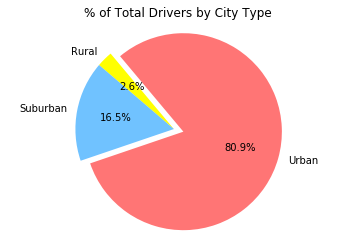

In [30]:
# Calculate Driver Percents - based on my analysis, the calculation only needs the "city_data.csv"
g_city_df = city_df.groupby("type")
driversbycity_pt = g_city_df["driver_count"].sum() / city_df["driver_count"].sum()

# Build Pie Charts
plt.pie(x=driversbycity_pt,
        explode=[0,0,0.1],
        labels=["Rural", "Suburban", "Urban"],
        colors=[[1,1,0,1], [0.3,0.7,1,0.8], [1,0.4,0.4,0.9]],
        autopct="%1.1f%%",
        startangle=130
)

plt.title("% of Total Drivers by City Type")

# create axes which are equal so we have a perfect circle
plt.axis("equal")

# get the current figure
fig4 = plt.gcf()

In [31]:
# Save Figure
fig4_path = os.path.join("..", "Pyber", "DriversByCity_Pie")
fig4.savefig(fig4_path, dpi=1200)

In [32]:
# Show Figure
plt.show()